In [18]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd

city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data)
# city_data_df.head(10)

In [19]:
ride_data_df = pd.read_csv(ride_data)
# ride_data_df.head(10)

In [20]:
# city_data_df.count()

In [21]:
# ride_data_df.count()

In [22]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [23]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [24]:
# city_data_df["type"].unique()

In [25]:
# sum(city_data_df["type"] == "Suburban")

In [26]:
pyber_data_df = pd.merge(city_data_df, ride_data_df, how="left", on=["city","city"])
pyber_data_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


In [27]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [28]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [29]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [30]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count= rural_cities_df.groupby(["city"]).mean()["driver_count"]

<IPython.core.display.Javascript object>


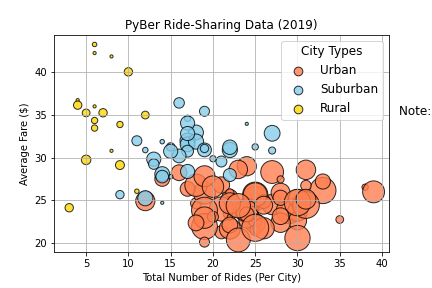

In [31]:
plt.scatter(urban_ride_count,
            urban_avg_fare, 
            s=urban_driver_count*10, 
            color="coral", 
            edgecolor="black", 
            linewidths=1, 
            alpha=.8, 
            label="Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

In [32]:
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, 
            color="skyblue",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8, 
            label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

In [33]:
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, 
            color="gold",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8, 
            label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

In [34]:
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

In [35]:
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize="12")

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

In [36]:
plt.savefig("Analysis/Fig1.png")